In [1]:
import torch 
from torch import nn
from torch.nn import functional as F 
from torch import optim 

import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt 
from  utils import plot_image,plot_curve,one_hot

In [2]:

batch_size = 512


In [3]:
train_loader = torch.utils.data.DataLoader(
	        torchvision.datasets.MNIST('mnist_data', train=True, download=True,
	                       transform=transforms.Compose([
	                           transforms.ToTensor(),
	                           transforms.Normalize((0.1307,), (0.3081,))
	                       ])),
	        batch_size = batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
	        torchvision.datasets.MNIST('mnist_data/', train=False, download=True,
	                       transform=transforms.Compose([
	                           transforms.ToTensor(),
	                           transforms.Normalize((0.1307,), (0.3081,))
	                       ])),
	        batch_size = batch_size, shuffle=True)

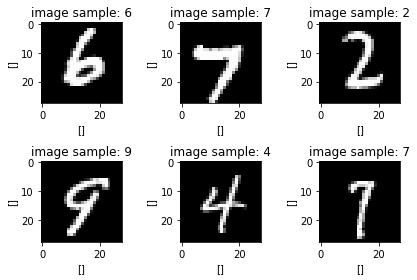

In [4]:
x , y  = next(iter(train_loader))
plot_image(x,y,'image sample')

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.108918
Train Epoch: 0 [1180/60000 (8%)]	Loss: 0.100100
Train Epoch: 0 [2360/60000 (17%)]	Loss: 0.087078
Train Epoch: 0 [3540/60000 (25%)]	Loss: 0.108472
Train Epoch: 0 [4720/60000 (34%)]	Loss: 0.117489
Train Epoch: 0 [5900/60000 (42%)]	Loss: 0.108218
Train Epoch: 0 [7080/60000 (51%)]	Loss: 0.154819
Train Epoch: 0 [8260/60000 (59%)]	Loss: 0.235465
Train Epoch: 0 [9440/60000 (68%)]	Loss: 0.228088
Train Epoch: 0 [10620/60000 (76%)]	Loss: 0.385626
Train Epoch: 0 [11800/60000 (85%)]	Loss: 0.435558
Train Epoch: 0 [12980/60000 (93%)]	Loss: 0.395452
Train Epoch: 1 [0/60000 (0%)]	Loss: 1.667667
Train Epoch: 1 [1180/60000 (8%)]	Loss: 2.784725
Train Epoch: 1 [2360/60000 (17%)]	Loss: 1.637568
Train Epoch: 1 [3540/60000 (25%)]	Loss: 11.855001
Train Epoch: 1 [4720/60000 (34%)]	Loss: 18.784760
Train Epoch: 1 [5900/60000 (42%)]	Loss: 11.772890
Train Epoch: 1 [7080/60000 (51%)]	Loss: 86.967178
Train Epoch: 1 [8260/60000 (59%)]	Loss: 129.852676
Train Epoch: 1 [9440/

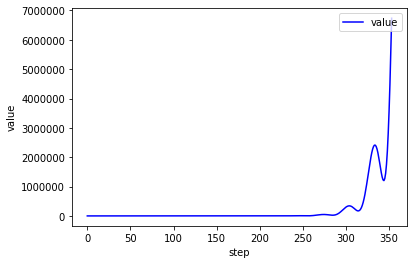

In [17]:
#创建网络
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        #wx+b
        self.fc1 = nn.Linear(28*28 ,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self , x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
#完成网络初始化
net = Net()   
optimizer = optim.SGD(net.parameters() , lr = 0.01 , momentum= 0.9)
train_loss = []

for epoch in range(3):
    for batch_idx , ( x,y ) in enumerate(train_loader):
        x = x.view(x.size(0),28*28)  
        out = net(x)
        y_oneHot = one_hot(y)
        loss  =F.mse_loss(out , y_oneHot)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        if batch_idx % 10 == 0:
	            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
	                epoch, batch_idx * len(train_loader), len(train_loader.dataset),
	                100. * batch_idx / len(train_loader), loss.item()))
plot_curve(train_loss)        